Задача 1

Воспользуйтесь API-интерфейсом для загрузки информации о фильмах из серии «Звёздные войны».

    Загрузите информацию о персонажах с индексами 1, 2, 3.
    Прочитайте JSON, для каждого значения вида https://swapi.dev/api/films/2/ запросите новый объект и замените эту строку на полученный объект.
    Сохраните файл в формате YAML.

In [6]:
import requests
import yaml

# Загрузка информации о персонажах с индексами 1, 2, 3
characters = []
for i in range(1, 4):
    url = f'https://swapi.dev/api/people/{i}'
    response = requests.get(url)
    if response.status_code == 200:
        character_data = response.json()
        characters.append(character_data)

# Для каждого персонажа заменяем URL фильмов на объекты с данными о фильмах
for character in characters:
    films_data = []
    for film_url in character['films']:
        film_response = requests.get(film_url)
        if film_response.status_code == 200:
            films_data.append(film_response.json())
    character['films'] = films_data

# Сохранение результата в формате YAML
with open('star_wars_characters.yaml', 'w', encoding='utf-8') as file:
    yaml.dump(characters, file, allow_unicode=True, default_flow_style=False)

print("Данные успешно сохранены в файл star_wars_characters.yaml")

Данные успешно сохранены в файл star_wars_characters.yaml


Задача 2

Дан файл server.json. Прочитайте файл и внесите изменения.

    Добавьте новый server (name: ‘’, ip: ‘’, user: ‘admin’).
    Для всех серверов замените хост верхнего уровня cloud.org на newcloud.com.
    Все серверы, в имени которых присутствует имя host1 или host2 (host[0-9]+), замените на prod1, prod2 и так далее.
    Если в качестве пользователя на сервере указан root, замените его на admin.
    Сохраните файл с изменениями в формате YAML.

In [13]:
import json
import re
import yaml

# Чтение файла server.json
try:
    with open('servers.json', 'r') as file:
        data = json.load(file)
except FileNotFoundError:
    print("Файл server.json не найден. Создается новый файл с базовой структурой.")
    data = {"servers": []}

# Добавление нового сервера
new_server = {"name": "", "ip": "", "user": "admin"}
if "servers" in data:
    data["servers"].append(new_server)
else:
    # Если структура файла отличается от ожидаемой, создаем стандартную
    data = {"servers": [new_server]}

# Обработка всех серверов
for server in data["servers"]:
    # Замена cloud.org на newcloud.com в поле IP (только в IP по условию)
    if "ip" in server and isinstance(server["ip"], str):
        server["ip"] = server["ip"].replace("cloud.org", "newcloud.com")
    
    # Замена имен host1, host2 и т.д. на prod1, prod2 и т.д.
    if "name" in server and isinstance(server["name"], str):
        # Используем регулярное выражение для замены всех вхождений
        server["name"] = re.sub(r"host(\d+)", r"prod\1", server["name"])
    
    # Замена пользователя root на admin
    if "user" in server and server["user"] == "root":
        server["user"] = "admin"

# Сохранение результата в формате YAML
with open('server.yaml', 'w', encoding='utf-8') as file:
    yaml.dump(data, file, allow_unicode=True, default_flow_style=False, indent=2)

print("Изменения успешно внесены и сохранены в файл server.yaml")

Изменения успешно внесены и сохранены в файл server.yaml


Задача 3

Дан файл с логами sshd. Загрузите файл ssh_2k.log, рассмотрите его содержимое.

    Найдите все строки вида Failed password for root from 5.36.59.76 port 42393 ssh2, выделите имена пользователей, исходящий IP-адрес, время и дату.
    Перечислите топ-5 имён пользователей, топ-5 исходящих IP-адресов, а также топ-5 подсетей в 16 бит (например, для адреса 5.36.59.76 мы выводим подсеть 5.36.x.x).
    Постройте гистограмму неудачных входов в зависимости от времени, с размером корзины 5–10 минут. Постарайтесь, чтобы было 10–15 корзин.

Всего найдено записей: 519

Топ-5 пользователей:
  root: 370
  admin: 44
  support: 6
  oracle: 6
  uucp: 5

Топ-5 IP-адресов:
  183.62.140.253: 286
  187.141.143.180: 80
  103.99.0.122: 46
  112.95.230.3: 26
  5.188.10.180: 17

Топ-5 подсетей:
  183.62.x.x: 286
  187.141.x.x: 80
  103.99.x.x: 46
  112.95.x.x: 26
  5.188.x.x: 17

Гистограмма сохранена в файл ssh_attempts_histogram.png


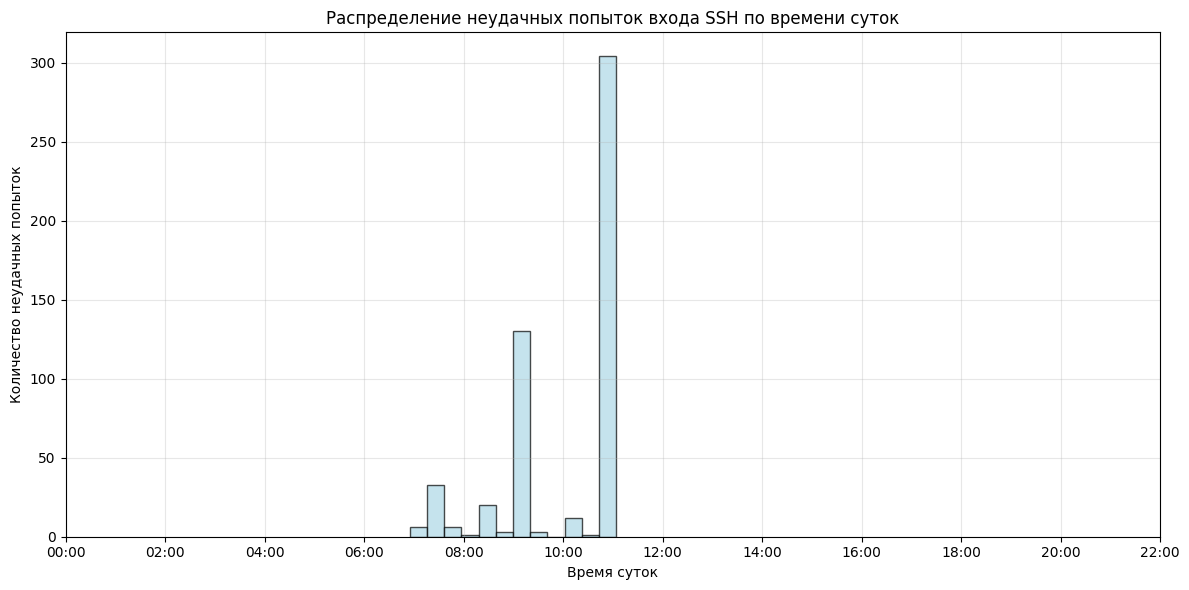

In [15]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Чтение логов
with open('ssh_2k.log', 'r') as f:
    logs = f.readlines()

# Структура для хранения данных
data = []

for line in logs:
    # Улучшенное регулярное выражение для захвата всех вариантов
    match = re.search(r'(\w{3}\s+\d{1,2}\s+\d{2}:\d{2}:\d{2}).*Failed password for (?:invalid user )?(\w+) from (\d+\.\d+\.\d+\.\d+)', line)
    if match:
        time_str, user, ip = match.groups()
        
        # Добавляем текущий год для корректного парсинга даты
        current_year = datetime.now().year
        full_time_str = f"{time_str} {current_year}"
        
        try:
            # Парсим время
            timestamp = datetime.strptime(full_time_str, "%b %d %H:%M:%S %Y")
            subnet = '.'.join(ip.split('.')[:2]) + '.x.x'
            
            data.append({
                'timestamp': timestamp,
                'user': user,
                'ip': ip,
                'subnet': subnet
            })
        except ValueError:
            continue

# Создаем DataFrame для удобной работы
df = pd.DataFrame(data)

print(f"Всего найдено записей: {len(df)}")

# Топ-5 по разным категориям
print("\nТоп-5 пользователей:")
for user, count in Counter(df['user']).most_common(5):
    print(f"  {user}: {count}")

print("\nТоп-5 IP-адресов:")
for ip, count in Counter(df['ip']).most_common(5):
    print(f"  {ip}: {count}")

print("\nТоп-5 подсетей:")
for subnet, count in Counter(df['subnet']).most_common(5):
    print(f"  {subnet}: {count}")

# Создаем временные метки в минутах для гистограммы
df['time_minutes'] = df['timestamp'].dt.hour * 60 + df['timestamp'].dt.minute

# Строим гистограмму с 12 корзинами (по 10 минут)
plt.figure(figsize=(12, 6))
plt.hist(df['time_minutes'], bins=12, color='lightblue', edgecolor='black', alpha=0.7)

# Настраиваем отображение времени на оси X
plt.xlabel('Время суток')
plt.ylabel('Количество неудачных попыток')
plt.title('Распределение неудачных попыток входа SSH по времени суток')

# Форматируем ось X для отображения времени
hours = range(0, 24, 2)
plt.xticks([h * 60 for h in hours], [f'{h:02d}:00' for h in hours])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ssh_attempts_histogram.png', dpi=300)
print("\nГистограмма сохранена в файл ssh_attempts_histogram.png")
plt.show()

Задача 4

    Загрузите файл Is.txt. Прочитайте файл и с помощью регулярных выражений посчитайте суммарный размер файлов.
    Посчитайте размеры файлов, содержащих слова prod, stage и dev, по отдельности.
    Выведите последнюю, а также самую раннюю дату изменения.
    Выведите список пользователей и список групп — владельцев файлов.

In [17]:
import re
from datetime import datetime
from collections import defaultdict

def parse_size(size_str):
    """Преобразует размер с суффиксами K, M в байты"""
    size_str = size_str.upper()
    if size_str.endswith('K'):
        return float(size_str[:-1]) * 1024
    elif size_str.endswith('M'):
        return float(size_str[:-1]) * 1024 * 1024
    else:
        return float(size_str)

# Чтение файла
with open('ls.txt', 'r') as f:
    lines = f.readlines()

# Регулярное выражение для разбора строк ls -l
pattern = r'^(\S+)\s+(\d+)\s+(\S+)\s+(\S+)\s+(\d+(?:\.\d+)?[KM]?)\s+(\w{3}\s+\d{1,2}\s+(?:\d{1,2}:\d{1,2}|\d{4}))\s+(.+)$'

total_size = 0
prod_size = 0
stage_size = 0
dev_size = 0
dates = []
users = set()
groups = set()

for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        permissions, links, user, group, size_str, date_str, filename = match.groups()
        
        # Добавляем пользователя и группу
        users.add(user)
        groups.add(group)
        
        # Преобразуем размер в байты и добавляем к общей сумме
        size_bytes = parse_size(size_str)
        total_size += size_bytes
        
        # Проверяем наличие ключевых слов в имени файла
        filename_lower = filename.lower()
        if 'prod' in filename_lower:
            prod_size += size_bytes
        if 'stage' in filename_lower:
            stage_size += size_bytes
        if 'dev' in filename_lower:
            dev_size += size_bytes
        
        # Парсим дату (учитываем разные форматы)
        current_year = datetime.now().year
        if ':' in date_str:
            # Формат с временем (текущий год)
            date_obj = datetime.strptime(f"{date_str} {current_year}", "%b %d %H:%M %Y")
        else:
            # Формат с годом
            date_obj = datetime.strptime(date_str, "%b %d %Y")
        
        dates.append(date_obj)

# Вывод результатов
print("=== АНАЛИЗ ФАЙЛОВ ===\n")

print(f"Суммарный размер всех файлов: {total_size:.2f} байт")
print(f"Суммарный размер файлов с 'prod': {prod_size:.2f} байт")
print(f"Суммарный размер файлов с 'stage': {stage_size:.2f} байт")
print(f"Суммарный размер файлов с 'dev': {dev_size:.2f} байт")

if dates:
    print(f"\nСамая ранняя дата изменения: {min(dates)}")
    print(f"Последняя дата изменения: {max(dates)}")

print(f"\nСписок пользователей-владельцев: {sorted(users)}")
print(f"Список групп-владельцев: {sorted(groups)}")

# Дополнительная статистика
print(f"\n=== ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ===")
print(f"Всего обработано строк: {len([l for l in lines if re.match(pattern, l.strip())])}")
print(f"Уникальных пользователей: {len(users)}")
print(f"Уникальных групп: {len(groups)}")

=== АНАЛИЗ ФАЙЛОВ ===

Суммарный размер всех файлов: 299583616.00 байт
Суммарный размер файлов с 'prod': 222822400.00 байт
Суммарный размер файлов с 'stage': 76757070.00 байт
Суммарный размер файлов с 'dev': 0.00 байт

Самая ранняя дата изменения: 2025-02-03 16:41:00
Последняя дата изменения: 2025-10-27 20:37:00

Список пользователей-владельцев: ['root']
Список групп-владельцев: ['root']

=== ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ===
Всего обработано строк: 12
Уникальных пользователей: 1
Уникальных групп: 1


Задача 5

Дана база данных в архиве.

    Скачайте архив chinook.zip. Разархивируйте его, используйте файл chinook.db для взаимодействия с базой данных.
    Выведите список таблиц в базе.
    Выведите список всех сотрудников.
    Выведите список городов, в которых проживают клиенты.
    Выведите список всех клиентов, которые проживают в городе, начинающемся на букву А

In [18]:
import sqlite3
import zipfile
import os

# Разархивируем файл, если нужно
if not os.path.exists('chinook.db'):
    with zipfile.ZipFile('chinook.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

# Подключаемся к базе данных
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

print("=== БАЗА ДАННЫХ CHINOOK ===\n")

# 1. Выводим список таблиц в базе
print("1. Список таблиц в базе данных:")
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(f"   - {table[0]}")

# 2. Выводим список всех сотрудников
print("\n2. Список всех сотрудников:")
cursor.execute("SELECT * FROM employees;")
employees = cursor.fetchall()
print("   ID | Имя | Фамилия | Должность | Email")
for employee in employees:
    print(f"   {employee[0]} | {employee[1]} | {employee[2]} | {employee[3]} | {employee[4]}")

# 3. Выводим список городов, в которых проживают клиенты
print("\n3. Города, в которых проживают клиенты:")
cursor.execute("SELECT DISTINCT City FROM customers ORDER BY City;")
cities = cursor.fetchall()
city_list = [city[0] for city in cities]
print("   Всего уникальных городов:", len(city_list))
print("   Список городов:", ", ".join(city_list))

# 4. Выводим клиентов из городов, начинающихся на 'A'
print("\n4. Клиенты из городов, начинающихся на 'A':")
cursor.execute("""
    SELECT CustomerId, FirstName, LastName, City, Country 
    FROM customers 
    WHERE City LIKE 'A%'
    ORDER BY City, LastName;
""")
customers_a = cursor.fetchall()

if customers_a:
    print("   ID | Имя | Фамилия | Город | Страна")
    for customer in customers_a:
        print(f"   {customer[0]} | {customer[1]} | {customer[2]} | {customer[3]} | {customer[4]}")
else:
    print("   Клиентов из городов на 'A' не найдено")

# Дополнительная информация
print(f"\n=== ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ ===")

# Количество записей в основных таблицах
cursor.execute("SELECT COUNT(*) FROM customers;")
customer_count = cursor.fetchone()[0]
print(f"Всего клиентов: {customer_count}")

cursor.execute("SELECT COUNT(*) FROM employees;")
employee_count = cursor.fetchone()[0]
print(f"Всего сотрудников: {employee_count}")

# Закрываем соединение
conn.close()

=== БАЗА ДАННЫХ CHINOOK ===

1. Список таблиц в базе данных:
   - albums
   - sqlite_sequence
   - artists
   - customers
   - employees
   - genres
   - invoices
   - invoice_items
   - media_types
   - playlists
   - playlist_track
   - tracks
   - sqlite_stat1

2. Список всех сотрудников:
   ID | Имя | Фамилия | Должность | Email
   1 | Adams | Andrew | General Manager | None
   2 | Edwards | Nancy | Sales Manager | 1
   3 | Peacock | Jane | Sales Support Agent | 2
   4 | Park | Margaret | Sales Support Agent | 2
   5 | Johnson | Steve | Sales Support Agent | 2
   6 | Mitchell | Michael | IT Manager | 1
   7 | King | Robert | IT Staff | 6
   8 | Callahan | Laura | IT Staff | 6

3. Города, в которых проживают клиенты:
   Всего уникальных городов: 53
   Список городов: Amsterdam, Bangalore, Berlin, Bordeaux, Boston, Brasília, Brussels, Budapest, Buenos Aires, Chicago, Copenhagen, Cupertino, Delhi, Dijon, Dublin, Edinburgh , Edmonton, Fort Worth, Frankfurt, Halifax, Helsinki, Lisbon, L

Задача 6

Воспользуйтесь кодом из раздела «Рекомендация» для создания базы данных taxis.sqlite3.

    Считайте данные из созданного файла в DataFrame.
    Удалите строки, в которых отсутствуют данные в колонках с категорийными или текстовыми данными.
    Заполните пропуски в числовых колонках, используя средние значения.
    Проверьте число дублированных строк.
    Удалите дубликаты.

In [19]:
import seaborn as sns
import sqlite3
import pandas as pd
import numpy as np

# Создание базы данных (если ещё не создана)
try:
    # Загружаем данные
    df = sns.load_dataset('taxis')
    df.index.name = 'id'

    # Добавляем пропуски как в рекомендации
    NA_PERCENT = 2 / 100

    for col in ['tip', 'passengers']:
        ind = np.random.randint(low=df.index.min(),
                                high=df.index.max(),
                                size=int(df.shape[0] * NA_PERCENT)).tolist()
        df.loc[ind, col] = np.nan
    
    # Сохраняем в базу данных
    with sqlite3.connect('taxis.sqlite3') as con:
        df.to_sql('trips', con=con, if_exists='replace', 
                 dtype={'id': 'INTEGER PRIMARY KEY AUTOINCREMENT'})
    
    print("База данных создана успешно")
    
except Exception as e:
    print(f"База данных уже существует или ошибка: {e}")

# Основная обработка данных
print("\n=== ОБРАБОТКА ДАННЫХ TAXIS ===\n")

# 1. Считываем данные из базы
with sqlite3.connect('taxis.sqlite3') as con:
    df = pd.read_sql_query("SELECT * FROM trips", con)

print("1. Исходные данные:")
print(f"   Размер датафрейма: {df.shape}")
print(f"   Колонки: {list(df.columns)}")

# 2. Удаляем строки с пропусками в категориальных/текстовых колонках
categorical_columns = ['color', 'payment', 'pickup_zone', 'dropoff_zone', 
                      'pickup_borough', 'dropoff_borough']

print(f"\n2. Удаление пропусков в категориальных колонках: {categorical_columns}")

# Проверяем пропуски до удаления
print("   Пропуски до обработки:")
for col in categorical_columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"     {col}: {missing_count} пропусков")

# Удаляем строки с пропусками в категориальных колонках
initial_count = len(df)
df = df.dropna(subset=categorical_columns)
removed_count = initial_count - len(df)
print(f"   Удалено строк: {removed_count}")

# 3. Заполняем пропуски в числовых колонках средними значениями
numeric_columns = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

print(f"\n3. Заполнение пропусков в числовых колонках: {numeric_columns}")

print("   Пропуски до заполнения:")
for col in numeric_columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"     {col}: {missing_count} пропусков")

# Заполняем пропуски средними значениями
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)
        print(f"     {col}: заполнено средним значением {mean_value:.2f}")

# 4. Проверяем количество дублированных строк
print(f"\n4. Проверка дубликатов:")
duplicate_count = df.duplicated().sum()
print(f"   Найдено дублированных строк: {duplicate_count}")

# 5. Удаляем дубликаты
print(f"\n5. Удаление дубликатов:")
initial_count = len(df)
df = df.drop_duplicates()
final_count = len(df)
removed_duplicates = initial_count - final_count
print(f"   Удалено дублированных строк: {removed_duplicates}")

# Итоговая информация
print(f"\n=== РЕЗУЛЬТАТ ===")
print(f"Исходный размер: {df.shape}")
print(f"Финальный размер: {df.shape}")
print(f"Всего удалено строк: {removed_count + removed_duplicates}")

# Проверяем, что нет пропусков
print(f"\nПроверка пропусков после обработки:")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("   Все пропуски устранены!")
else:
    for col, count in missing_data.items():
        if count > 0:
            print(f"   {col}: {count} пропусков")

# Сохраняем обработанные данные (опционально)
with sqlite3.connect('taxis_cleaned.sqlite3') as con:
    df.to_sql('trips_cleaned', con=con, index=False, 
             dtype={'id': 'INTEGER PRIMARY KEY AUTOINCREMENT'})
print(f"\nОчищенные данные сохранены в taxis_cleaned.sqlite3")

База данных создана успешно

=== ОБРАБОТКА ДАННЫХ TAXIS ===

1. Исходные данные:
   Размер датафрейма: (6433, 15)
   Колонки: ['id', 'pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']

2. Удаление пропусков в категориальных колонках: ['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']
   Пропуски до обработки:
     payment: 44 пропусков
     pickup_zone: 26 пропусков
     dropoff_zone: 45 пропусков
     pickup_borough: 26 пропусков
     dropoff_borough: 45 пропусков
   Удалено строк: 92

3. Заполнение пропусков в числовых колонках: ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']
   Пропуски до заполнения:
     passengers: 125 пропусков
     tip: 122 пропусков
     passengers: заполнено средним значением 1.54
     tip: заполнено средним значением 1.98

4. Проверка дубликатов:
   Найдено дублированных строк: 0

5. Удаление д

Задача 7

Используйте базу данных SQLite, необходимо составить SQL-запросы INNER JOIN, DISTINCT, UNION, COUNT, AVG, MAX, MIN. Продолжайте работать с базой chinook.db.

    Выведите имя и фамилию клиента, а также город проживания и имя и фамилию сотрудника, который взаимодействует с клиентом (ключ SupportRepid в таблице customers) (JOIN).
    Выведите названия треков из альбома А, а также соответствующие им жанры (JOIN).
    Выведите максимальную и минимальную длительность трека из альбома С.
    Выведите среднюю стоимость инвойса для города City.

In [20]:
import sqlite3
import pandas as pd

# Подключение к базе данных
conn = sqlite3.connect('chinook.db')

print("=== ЗАПРОС 1: Клиенты и их сотрудники поддержки (JOIN) ===")
query1 = """
SELECT 
    c.FirstName AS CustomerFirstName, 
    c.LastName AS CustomerLastName, 
    c.City AS CustomerCity,
    e.FirstName AS EmployeeFirstName, 
    e.LastName AS EmployeeLastName
FROM customers c
INNER JOIN employees e ON c.SupportRepId = e.EmployeeId;
"""
result1 = pd.read_sql_query(query1, conn)
print(result1)

print("\n=== ЗАПРОС 2: Треки из альбома 'For Those About To Rock We Salute You' и их жанры (JOIN) ===")
query2 = """
SELECT 
    t.Name AS TrackName, 
    g.Name AS GenreName,
    a.Title AS AlbumTitle
FROM tracks t
INNER JOIN albums a ON t.AlbumId = a.AlbumId
INNER JOIN genres g ON t.GenreId = g.GenreId
WHERE a.Title = 'For Those About To Rock We Salute You';
"""
result2 = pd.read_sql_query(query2, conn)
print(result2)

print("\n=== ЗАПРОС 3: Максимальная и минимальная длительность трека из альбома 'Balls to the Wall' ===")
query3 = """
SELECT 
    MAX(t.Milliseconds) AS MaxDuration_ms, 
    MIN(t.Milliseconds) AS MinDuration_ms,
    a.Title AS AlbumTitle
FROM tracks t
INNER JOIN albums a ON t.AlbumId = a.AlbumId
WHERE a.Title = 'Balls to the Wall';
"""
result3 = pd.read_sql_query(query3, conn)
print(result3)

print("\n=== ЗАПРОС 4: Средняя стоимость инвойсов для города Prague ===")
query4 = """
SELECT 
    BillingCity,
    AVG(Total) AS AverageInvoiceAmount,
    COUNT(InvoiceId) AS NumberOfInvoices
FROM invoices
WHERE BillingCity = 'Prague'
GROUP BY BillingCity;
"""
result4 = pd.read_sql_query(query4, conn)
print(result4)

# Закрытие соединения с базой данных
conn.close()

=== ЗАПРОС 1: Клиенты и их сотрудники поддержки (JOIN) ===
   CustomerFirstName CustomerLastName         CustomerCity EmployeeFirstName  \
0               Luís        Gonçalves  São José dos Campos              Jane   
1             Leonie           Köhler            Stuttgart             Steve   
2           François         Tremblay             Montréal              Jane   
3              Bjørn           Hansen                 Oslo          Margaret   
4          František      Wichterlová               Prague          Margaret   
5             Helena             Holý               Prague             Steve   
6             Astrid           Gruber               Vienne             Steve   
7               Daan          Peeters             Brussels          Margaret   
8               Kara          Nielsen           Copenhagen          Margaret   
9            Eduardo          Martins            São Paulo          Margaret   
10         Alexandre            Rocha            São Paulo   